## Figure 3 et 5 - DINOv2

/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. 

Device : cuda


/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Extraction des features...: 100%|██████████| 499/499 [03:48<00:00,  2.19it/s]


Shape des Features : torch.Size([15962, 768])
Préparation du t-SNE...


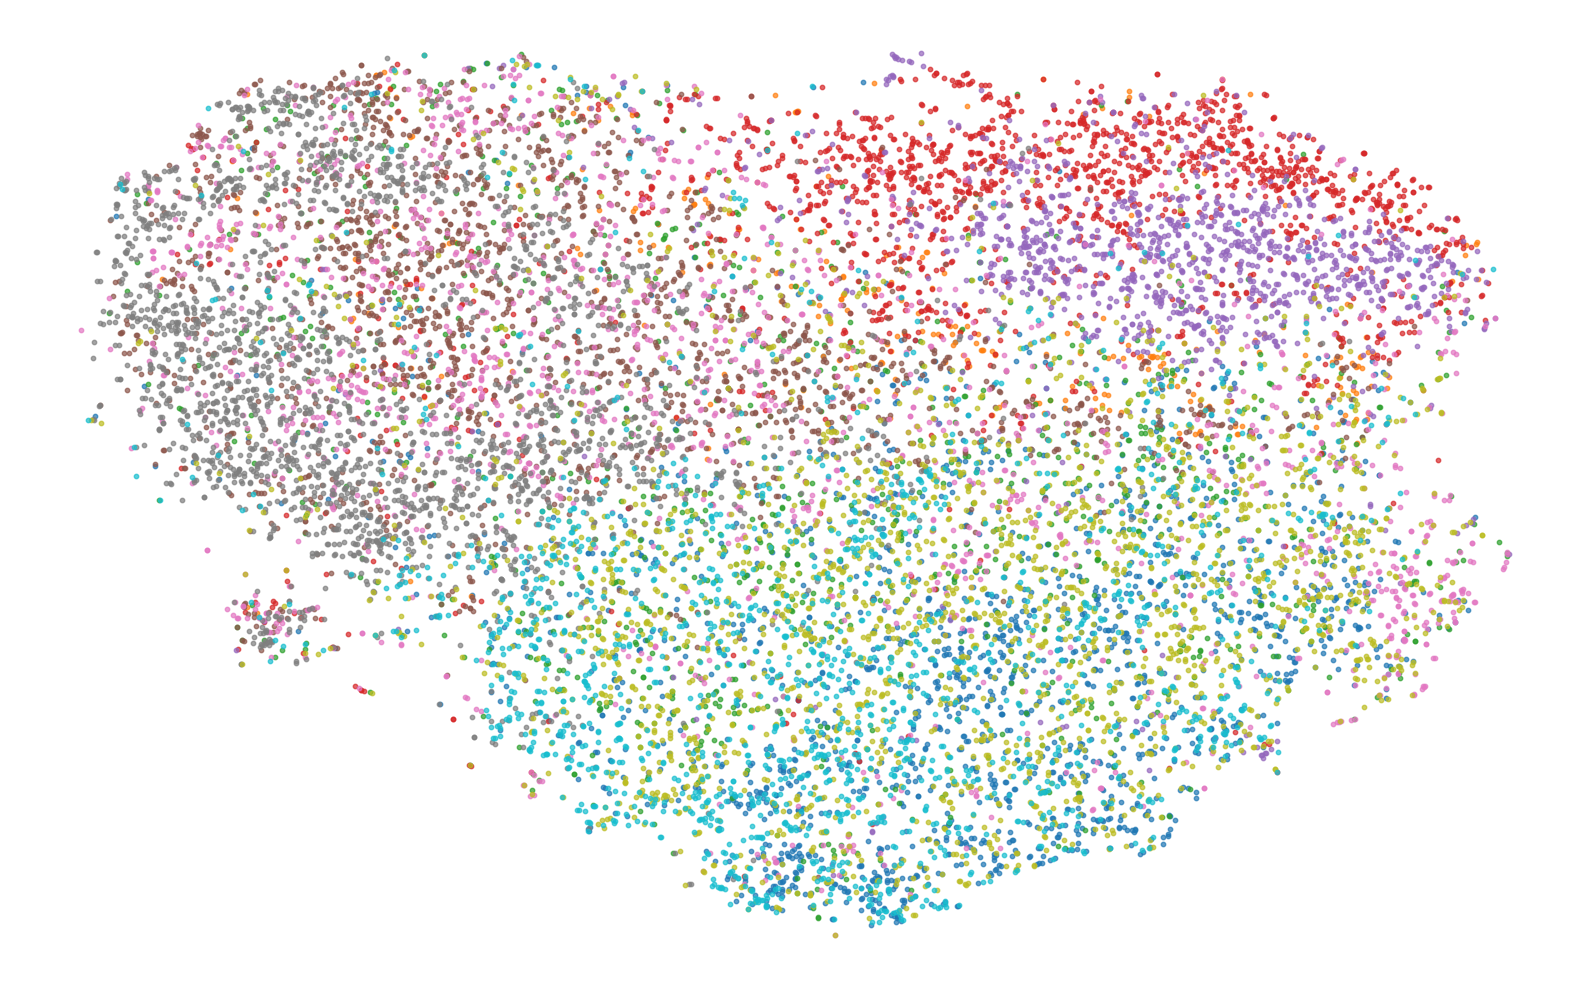

/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Device : cuda


Extraction des features...: 100%|██████████| 499/499 [03:43<00:00,  2.23it/s]


Shape des Features : torch.Size([15962, 768])
Préparation du t-SNE...


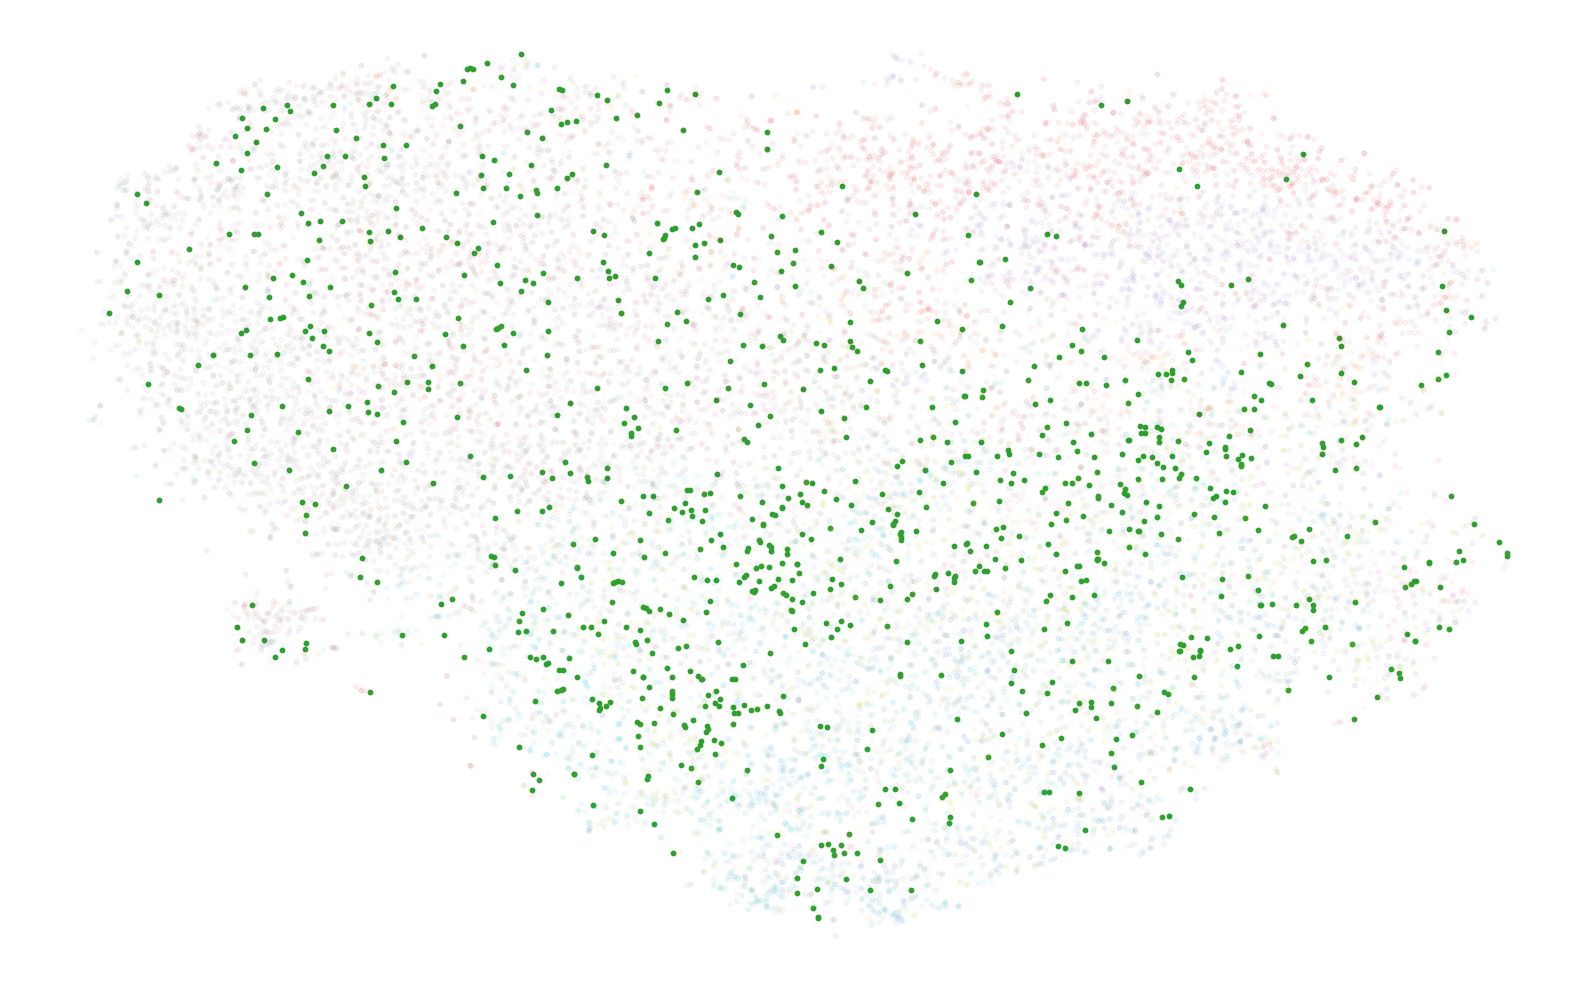

/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Device : cuda


Extraction des features...: 100%|██████████| 499/499 [03:56<00:00,  2.11it/s]


Shape des Features : torch.Size([15962, 768])
Préparation du t-SNE...


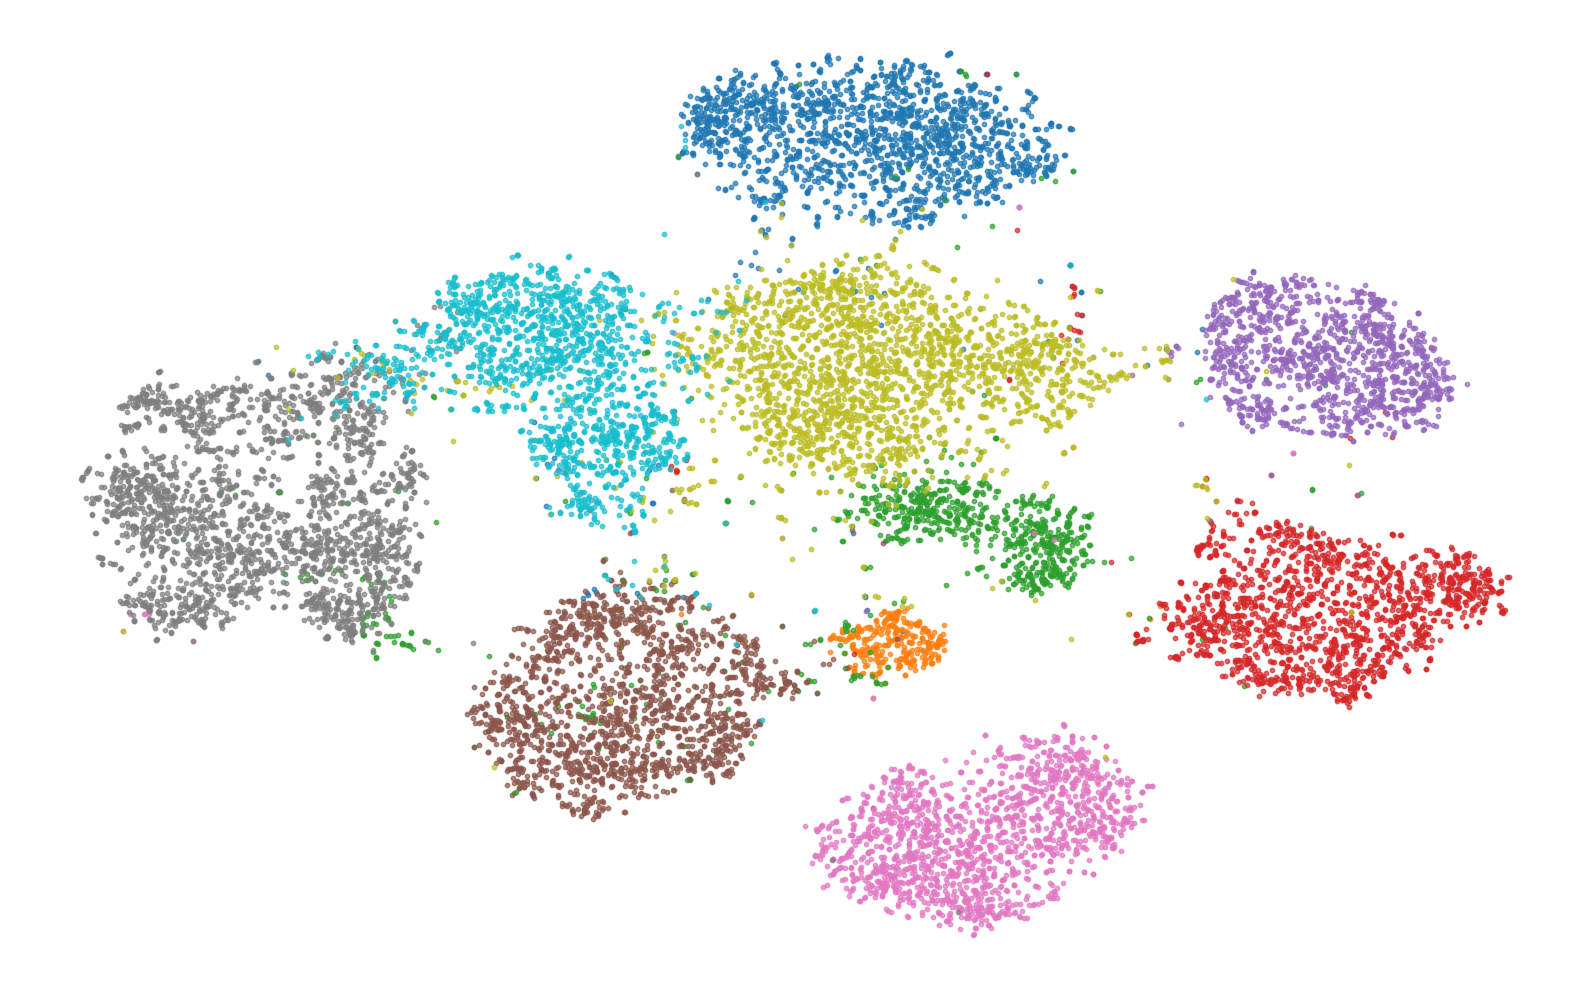

/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Device : cuda


Extraction des features...: 100%|██████████| 499/499 [03:49<00:00,  2.17it/s]


Shape des Features : torch.Size([15962, 768])
Préparation du t-SNE...


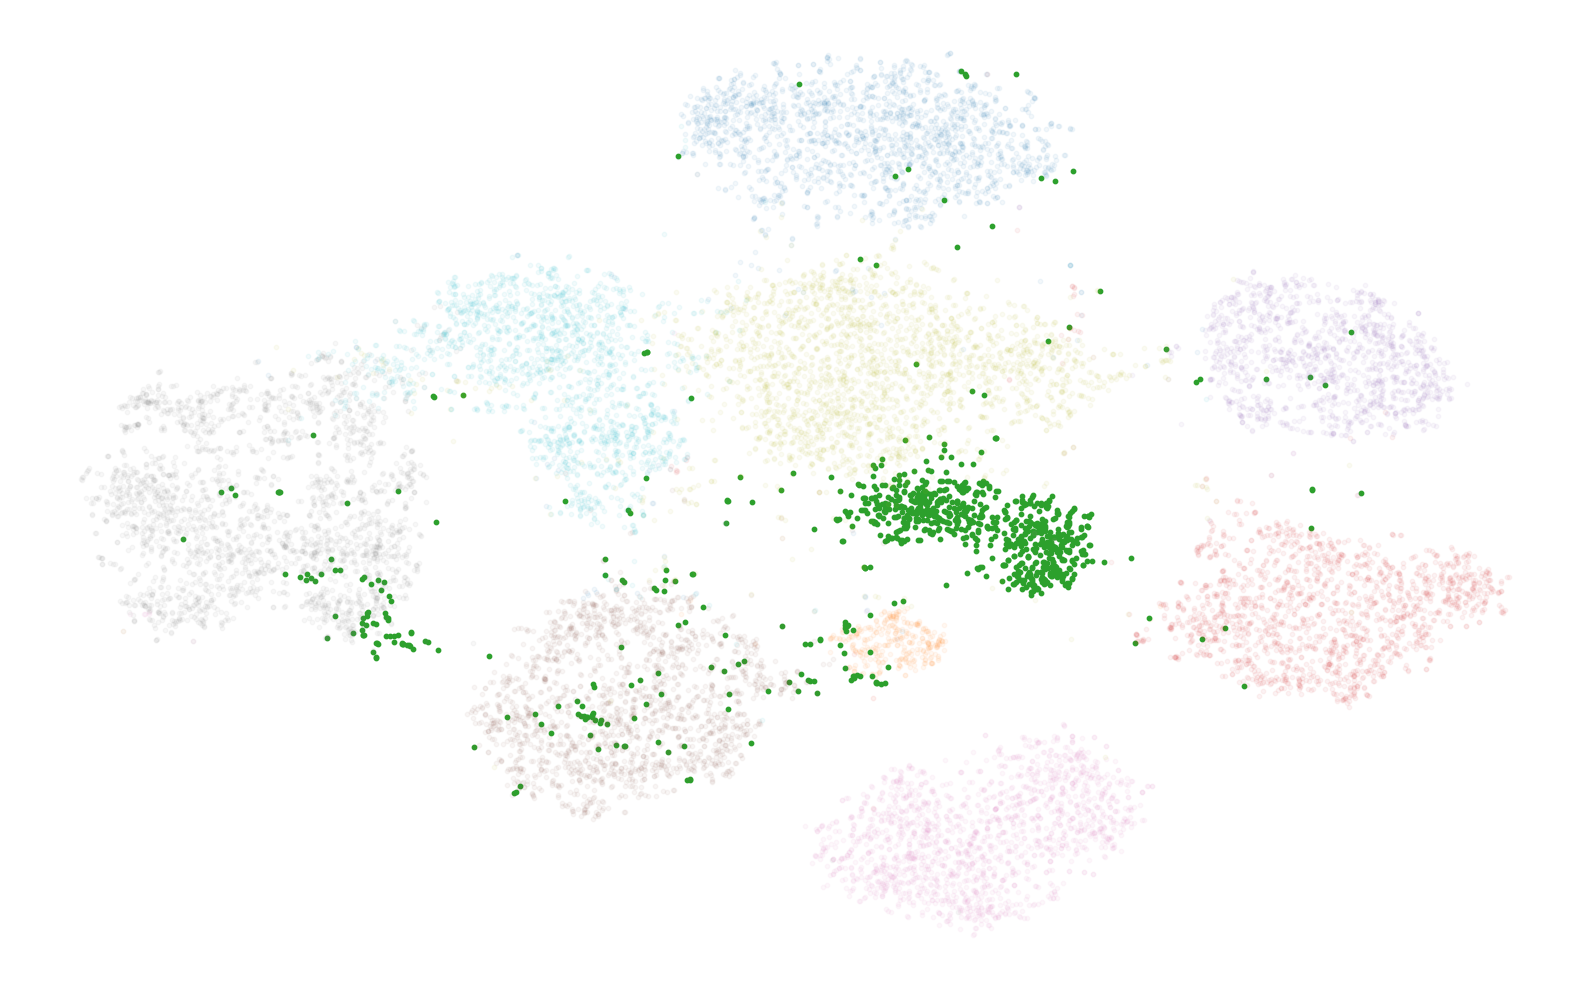

In [ ]:
from transformers import AutoImageProcessor, AutoModel
from datasets import load_dataset
from sklearn.manifold import TSNE
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
#disable warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Géneration des t-SNE pour la Figure N°3 (Partie DINOv2) et la Figure N°5 
def plot_tsne(pretrained_model_name, filename, highlight_class=None):

    # Sélection du modèle
    pretrained_model_name = pretrained_model_name

    # Chargement du dataset
    dataset_name = "matthieulel/galaxy10_decals"
    batch_size = 32
    dataset = load_dataset(dataset_name, split="train")
    #print(f"Dataset : {dataset}")

    # Classes du dataset
    labels = [
            'Disturbed Galaxies',
            'Merging Galaxies',
            'Round Smooth Galaxies',
            'In-between Round Smooth Galaxies',
            'Cigar Shaped Smooth Galaxies',
            'Barred Spiral Galaxies',
            'Unbarred Tight Spiral Galaxies',
            'Unbarred Loose Spiral Galaxies',
            'Edge-on Galaxies without Bulge',
            'Edge-on Galaxies with Bulge'
        ]

    # Activer cuda si disponible
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Device : {device}")

    # Chargement du modèle
    model = AutoModel.from_pretrained(pretrained_model_name).to(device).eval()
    processor = AutoImageProcessor.from_pretrained(pretrained_model_name)

    # Extraction des features
    all_features = []
    all_labels = []
    all_ids = []
    global_id = 0  

    for i in tqdm(range(0, len(dataset), batch_size), desc="Extraction des features..."):
        batch = dataset[i : i + batch_size]
        images = [img.convert("RGB") for img in batch["image"]]
        inputs = processor(images=images, return_tensors="pt").to(device)
        
        # Nb images dans le batch
        num_images = len(images) 

        with torch.no_grad():
            features = model(**inputs).last_hidden_state
            features = features[:, 0, :] # [CLS] token
            
        all_features.append(features.cpu())
        all_labels.extend(batch["label"])
        # Batch IDs
        batch_ids = list(range(global_id, global_id + num_images))
        all_ids.extend(batch_ids)
        global_id += num_images

    all_features = torch.cat(all_features)
    print(f"Shape des Features : {all_features.shape}")

    # t-SNE
    print("Préparation du t-SNE...")
    tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
    tsne_results = tsne.fit_transform(all_features.numpy())

    # Datas
    x = tsne_results[:, 0]
    y = tsne_results[:, 1]
    labels = np.array([labels[i] for i in all_labels])

    # Création de la figure
    fig, ax = plt.subplots(figsize=(16, 10), dpi=100)
    
    for label in np.unique(labels):
        if highlight_class and label == highlight_class:
            ax.scatter(x[labels == label], y[labels == label], alpha=1.0, s=10)
        else:
            ax.scatter(x[labels == label], y[labels == label], alpha=0.05 if highlight_class else 0.7, s=10) # mise en avant de la classe "Disturbed Galaxies"

    # Suppression des bordures et des axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

    # Fond blanc
    ax.set_facecolor('white')
    plt.tight_layout()
    
    # Save
    plt.savefig(filename, format="png", bbox_inches="tight", pad_inches=0)
    plt.show()
    plt.close(fig)



# DINOv2 - Figure de t-SNE à partir du pre-entrainement (Partie de la figure 3 et 5)
plot_tsne("facebook/dinov2-base-imagenet1k-1-layer","figures/tsne_dinov2_base_pretrain_part-Fig3.png")
plot_tsne("facebook/dinov2-base-imagenet1k-1-layer", "figures/tsne_dinov2_base_pretrain_disturb_part-Fig5.png", highlight_class="Disturbed Galaxies")

# DINOv2 - Figure de t-SNE après spécialisation (Partie de la figure 3 et 5)
plot_tsne("matthieulel/dinov2-base-imagenet1k-1-layer-finetuned-galaxy10-decals","figures/tsne_dinov2_base_finetune_part-Fig3.png")
plot_tsne("matthieulel/dinov2-base-imagenet1k-1-layer-finetuned-galaxy10-decals", "figures/tsne_dinov2_base_finetune_disturb_part-Fig5.png", highlight_class="Disturbed Galaxies")



## Figure 3 - Partie ViT, BeIT, SwinV2

/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. 

Device : cuda


/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-384 and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/transformers/models/vit/feature_extraction

Shape des Features : torch.Size([15962, 768])
Préparation du t-SNE...


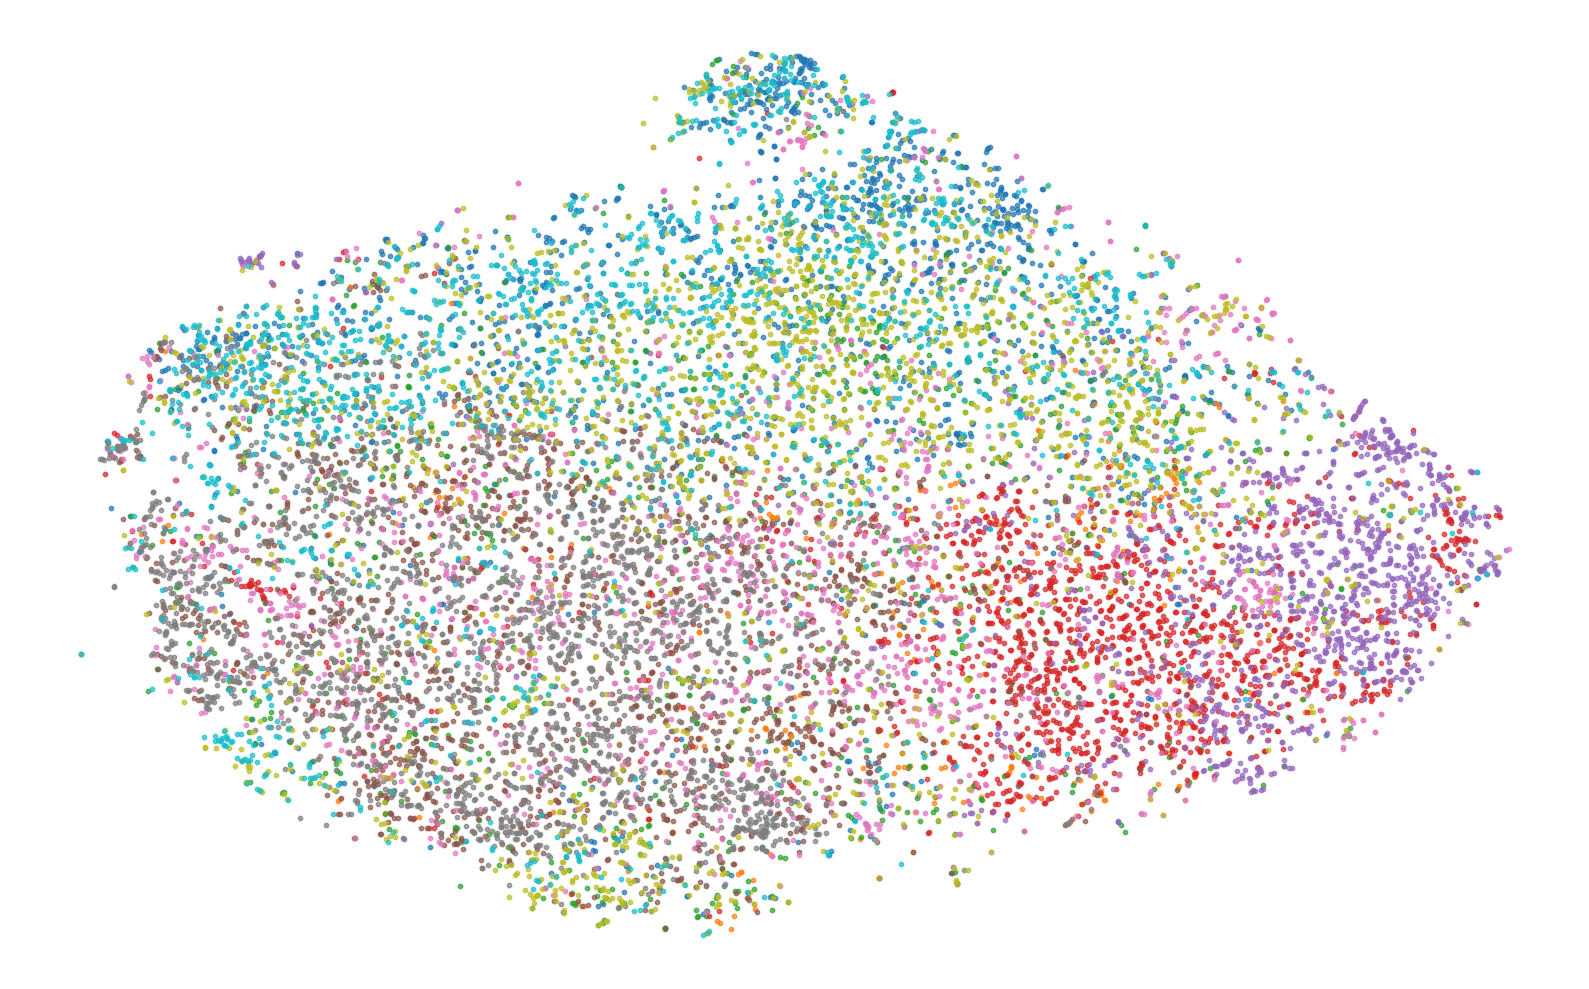

/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Device : cuda


Some weights of ViTModel were not initialized from the model checkpoint at matthieulel/vit-base-patch16-384-finetuned-galaxy10-decals and are newly initialized: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Extraction des features...: 100%|██████████| 499/499 [06:42<00:00,  1.24it/s]


Shape des Features : torch.Size([15962, 768])
Préparation du t-SNE...


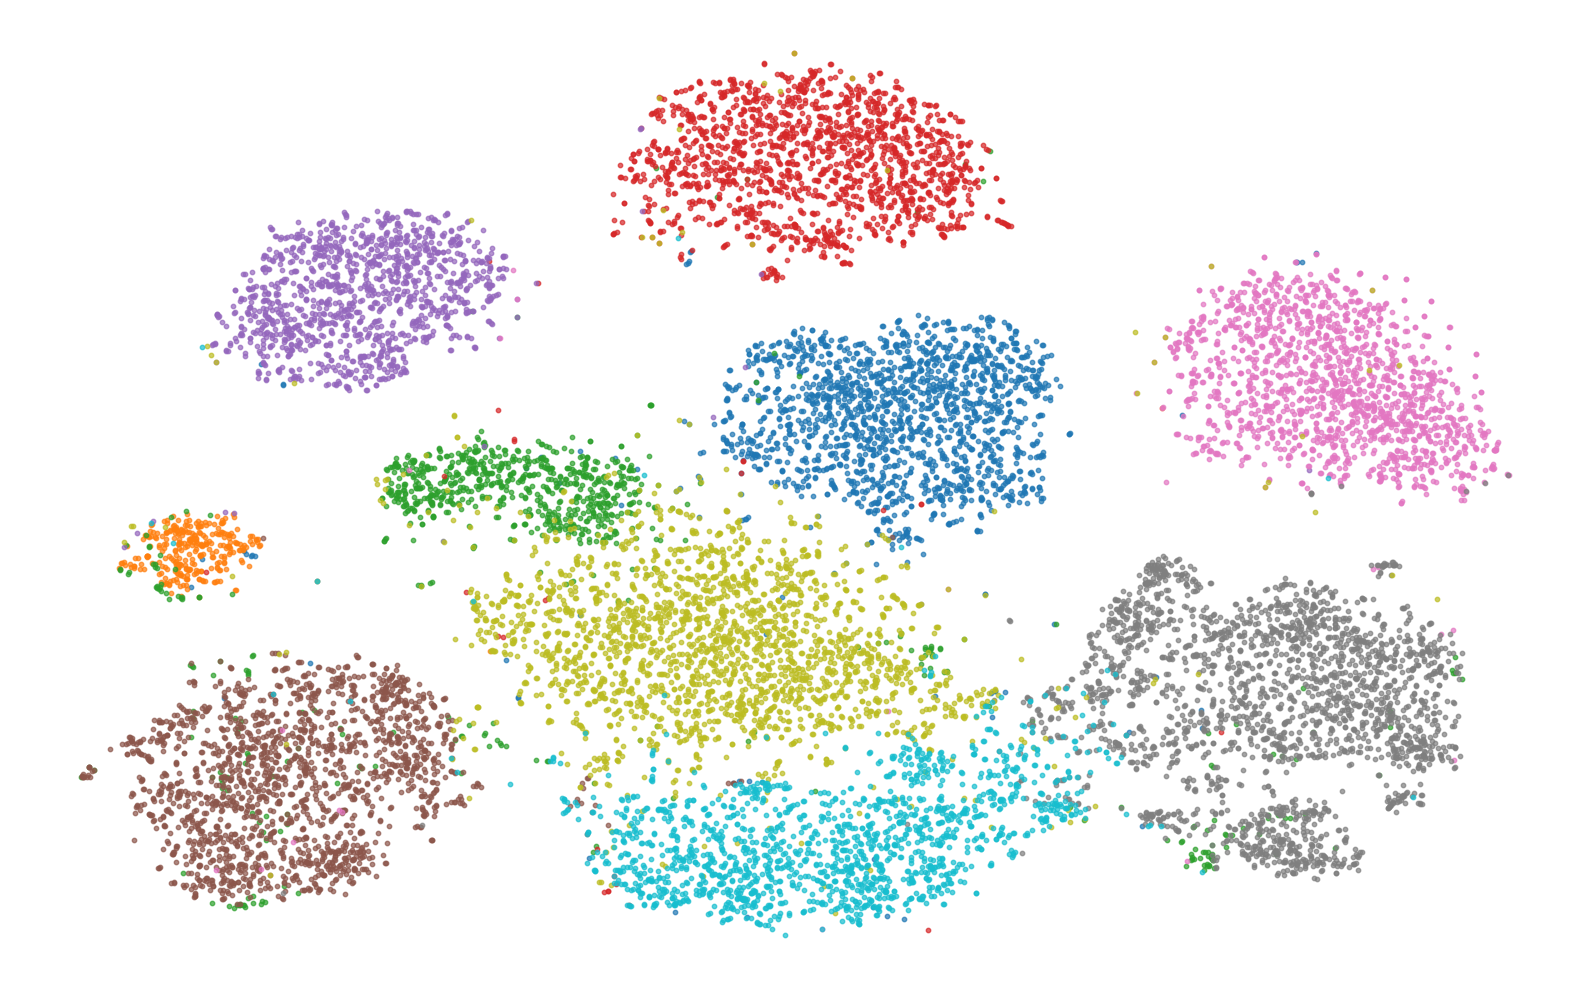

/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Device : cuda


/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
Some weights of BeitModel were not initialized from the model checkpoint at microsoft/beit-base-patch16-224-pt22k and are newly initialized: ['beit.pooler.layernorm.weight', 'beit.pooler.layernorm.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/transformers/models/beit/feature_extraction_beit.py:28: FutureWarning: The class BeitFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use BeitImageProcessor instead.
  warnings.warn(
Extraction des features...: 100%|██████████| 499/499 [03:12<00:00,  2.59it/s]


Shape des Features : torch.Size([15962, 768])
Préparation du t-SNE...


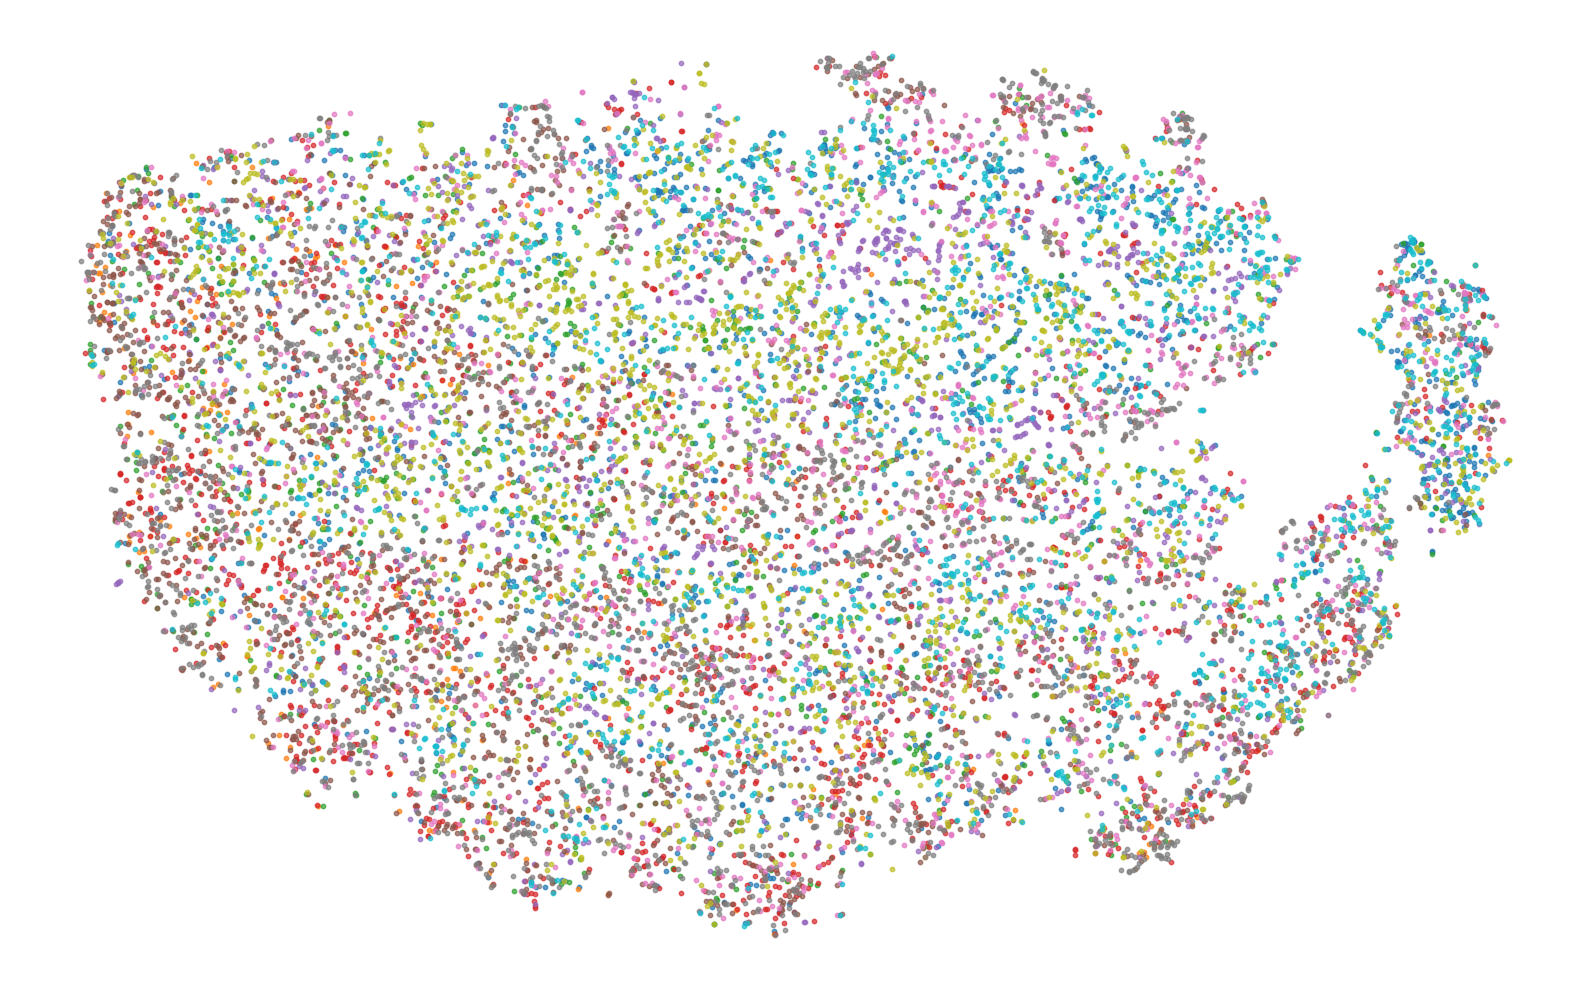

/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Device : cuda


/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/transformers/models/beit/feature_extraction_beit.py:28: FutureWarning: The class BeitFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use BeitImageProcessor instead.
  warnings.warn(
Extraction des features...: 100%|██████████| 499/499 [03:13<00:00,  2.58it/s]


Shape des Features : torch.Size([15962, 768])
Préparation du t-SNE...


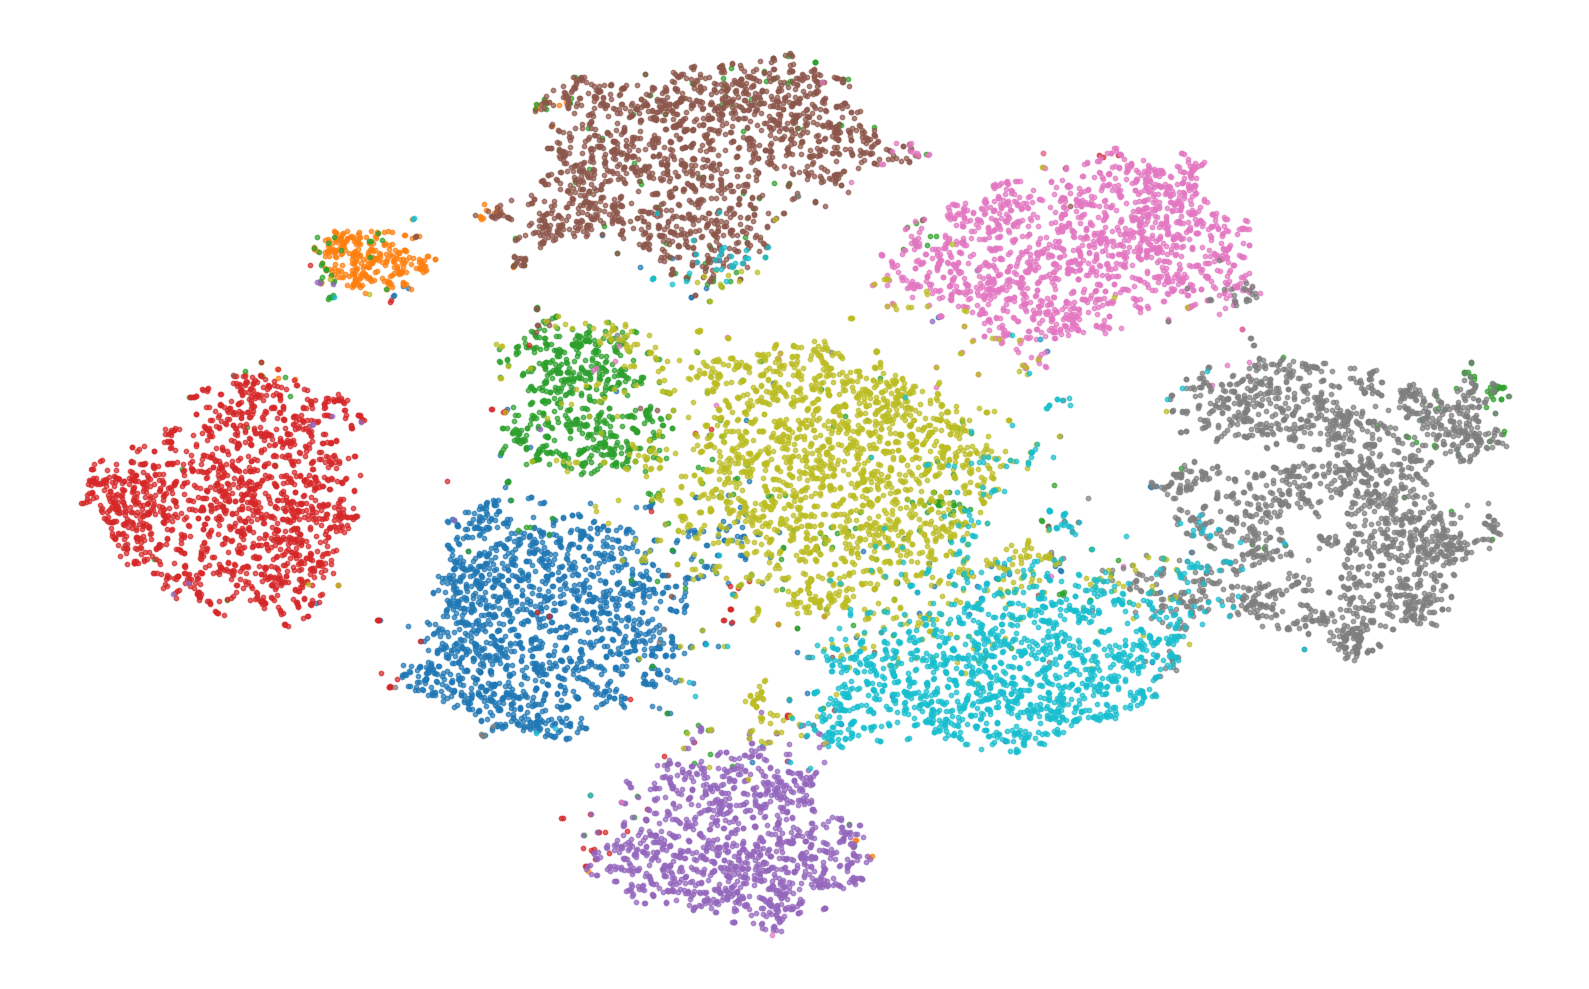

/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Device : cuda


/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Extraction des features...: 100%|██████████| 499/499 [04:07<00:00,  2.02it/s]


Shape des Features : torch.Size([15962, 1024])
Préparation du t-SNE...


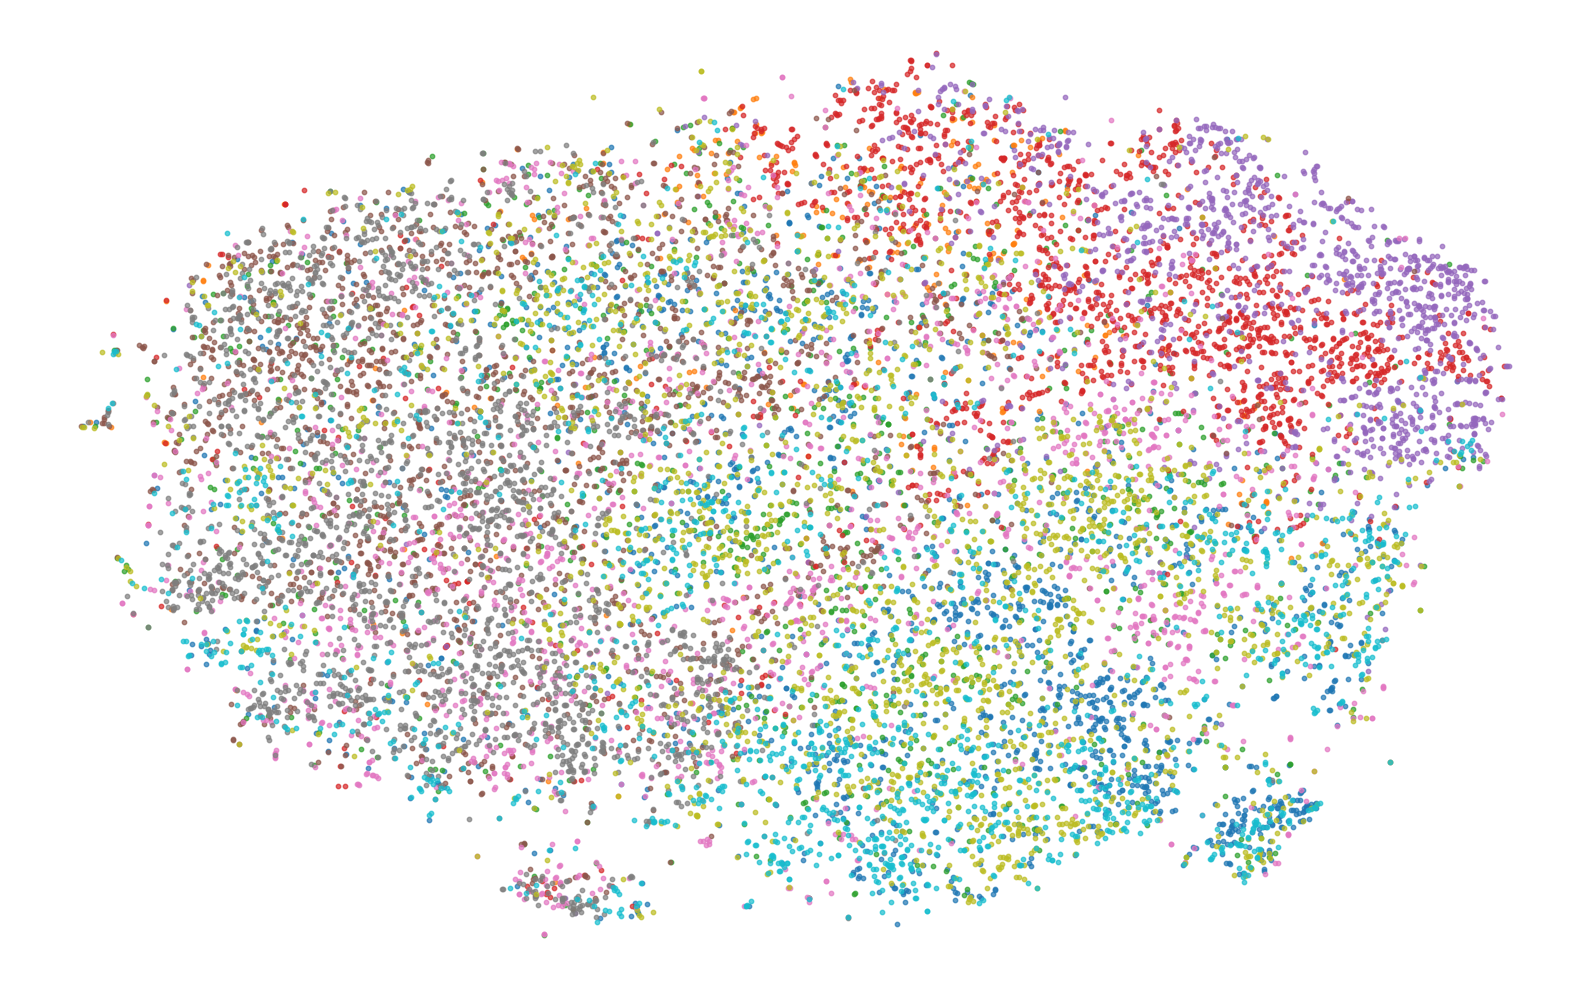

/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by promote_options='default'.
  table = cls._concat_blocks(blocks, axis=0)
/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Device : cuda


/share/home/lelain/.conda/envs/gretsienv/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Extraction des features...: 100%|██████████| 499/499 [04:07<00:00,  2.02it/s]


Shape des Features : torch.Size([15962, 1024])
Préparation du t-SNE...


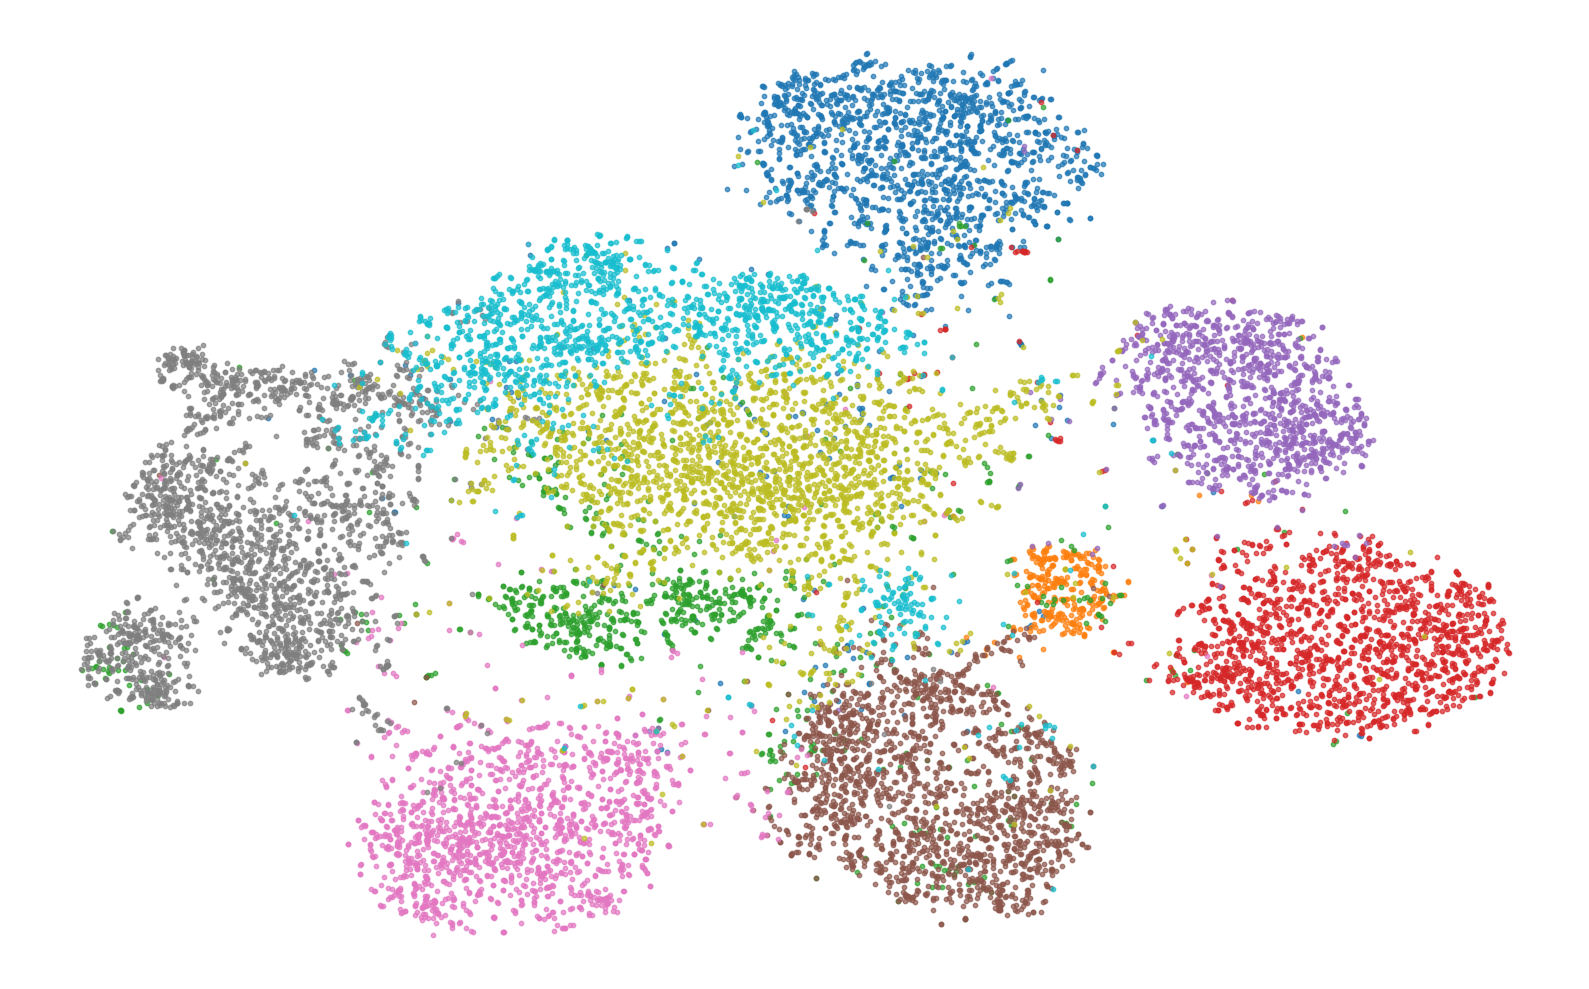

In [1]:
from transformers import AutoFeatureExtractor, AutoModel
from datasets import load_dataset
from sklearn.manifold import TSNE
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
#disable warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Géneration des t-SNE pour la Figure N°3 (Partie ViT, BEiT, SWINv2)
def plot_tsne(pretrained_model_name, filename, highlight_class=None):

    # Sélection du modèle
    pretrained_model_name = pretrained_model_name

    # Chargement du dataset
    dataset_name = "matthieulel/galaxy10_decals"
    batch_size = 32
    dataset = load_dataset(dataset_name, split="train")
    #print(f"Dataset : {dataset}")

    # Classes du dataset
    labels = [
            'Disturbed Galaxies',
            'Merging Galaxies',
            'Round Smooth Galaxies',
            'In-between Round Smooth Galaxies',
            'Cigar Shaped Smooth Galaxies',
            'Barred Spiral Galaxies',
            'Unbarred Tight Spiral Galaxies',
            'Unbarred Loose Spiral Galaxies',
            'Edge-on Galaxies without Bulge',
            'Edge-on Galaxies with Bulge'
        ]

    # Activer cuda si disponible
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Device : {device}")

    # Chargement du modèle
    model = AutoModel.from_pretrained(pretrained_model_name).to(device).eval()
    extractor = AutoFeatureExtractor.from_pretrained(pretrained_model_name)
    


    # Extraction des features
    all_features = []
    all_labels = []
    all_ids = []
    global_id = 0  

    for i in tqdm(range(0, len(dataset), batch_size), desc="Extraction des features..."):
        batch = dataset[i : i + batch_size]
        images = [img.convert("RGB") for img in batch["image"]]
        inputs = extractor(images=images, return_tensors="pt").to(device)
        
        # Nb images dans le batch
        num_images = len(images) 

        with torch.no_grad():
            features = model(**inputs).last_hidden_state
            features = features.mean(dim=1) # Global average pooling
            
        all_features.append(features.cpu())
        all_labels.extend(batch["label"])
        # Batch IDs
        batch_ids = list(range(global_id, global_id + num_images))
        all_ids.extend(batch_ids)
        global_id += num_images

    all_features = torch.cat(all_features)
    print(f"Shape des Features : {all_features.shape}")

    # t-SNE
    print("Préparation du t-SNE...")
    tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
    tsne_results = tsne.fit_transform(all_features.numpy())

    # Datas
    x = tsne_results[:, 0]
    y = tsne_results[:, 1]
    labels = np.array([labels[i] for i in all_labels])

    # Création de la figure
    fig, ax = plt.subplots(figsize=(16, 10), dpi=100)
    
    for label in np.unique(labels):
        if highlight_class and label == highlight_class:
            ax.scatter(x[labels == label], y[labels == label], alpha=1.0, s=10)
        else:
            ax.scatter(x[labels == label], y[labels == label], alpha=0.05 if highlight_class else 0.7, s=10) # mise en avant de la classe "Disturbed Galaxies"

    # Suppression des bordures et des axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

    # Fond blanc
    ax.set_facecolor('white')
    plt.tight_layout()
    
    # Save
    plt.savefig(filename, format="png", bbox_inches="tight", pad_inches=0)
    plt.show()
    plt.close(fig)




# Figure 3 - t-SNE à partir du pre-entrainement - ViT
plot_tsne("google/vit-base-patch16-384","figures/tsne_vit_base_pretrain_part-Fig3.png")
# Figure 3 - t-SNE après spécialisation - ViT
plot_tsne("matthieulel/vit-base-patch16-384-finetuned-galaxy10-decals","figures/tsne_vit_base_finetune_part-Fig3.png")


# Figure 3 - t-SNE à partir du pre-entrainement - BEiT
plot_tsne("microsoft/beit-base-patch16-224-pt22k","figures/tsne_beit_base_pretrain_part-Fig3.png")
# Figure 3 - t-SNE après spécialisation - BEiT
plot_tsne("matthieulel/beit-base-patch16-224-pt22k-finetuned-galaxy10-decals","figures/tsne_beit_base_finetune_part-Fig3.png")


# Figure 3 - t-SNE à partir du pre-entrainement - SWINv2
plot_tsne("microsoft/swinv2-base-patch4-window12to16-192to256-22kto1k-ft","figures/tsne_swinv2_base_pretrain_part-Fig3.png")
# Figure 3 - t-SNE après spécialisation - SWINv2
plot_tsne("matthieulel/swinv2-base-patch4-window12to16-192to256-22kto1k-ft-finetuned-galaxy10-decals","figures/tsne_swinv2_base_finetune_part-Fig3.png")


